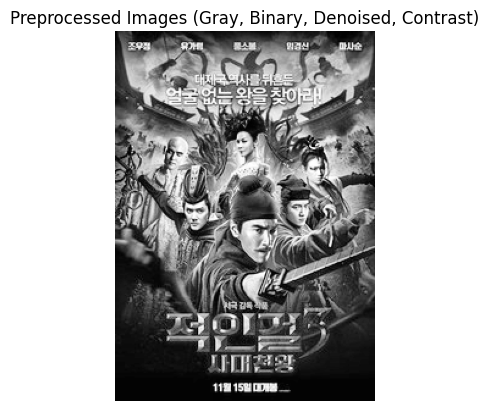

'img2.jpg' 파일이 이미 존재합니다. 덮어씌워집니다.
이미지가 'img2.jpg'에 성공적으로 저장되었습니다.


In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기
a = cv2.imread('img.jpg')  # 이미지 경로 설정
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)  # BGR에서 RGB로 변환 (Matplotlib 사용을 위해)

# 1. 그레이스케일 변환
gray_image = cv2.cvtColor(a, cv2.COLOR_RGB2GRAY)

# 2. 이진화
# _, binary_image = cv2.threshold(gray_image, 40, 255, cv2.THRESH_BINARY)

# 3. 노이즈 제거 (미디안 필터 사용)
denoised_image = cv2.medianBlur(gray_image, 1)

# 4. 대비 증가 (히스토그램 평활화)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
contrast_image = clahe.apply(denoised_image)

# 최종 이미지 합치기
final_image = np.hstack((gray_image, binary_image, denoised_image, contrast_image))

# 결과 출력
# plt.figure(figsize=(12, 6))
plt.imshow(contrast_image, cmap='gray')
plt.title('Preprocessed Images (Gray, Binary, Denoised, Contrast)')
plt.axis('off')
plt.show()
# cv2.imshow('final',final_image)

import os

output_path = 'img2.jpg'  # 저장할 파일 경로

# 파일이 존재하는지 확인
if os.path.exists(output_path):
    print(f"'{output_path}' 파일이 이미 존재합니다. 덮어씌워집니다.")

# 이미지 저장
success = cv2.imwrite(output_path, contrast_image)  # 최종 이미지 저장

if success:
    print(f"이미지가 '{output_path}'에 성공적으로 저장되었습니다.")
else:
    print("이미지 저장에 실패했습니다.")

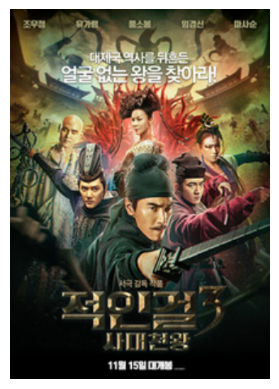

이미지가 'img3.jpg'에 성공적으로 저장되었습니다.


In [126]:
import cv2
import numpy as np

# 이미지 로드
image = cv2.imread('img.jpg')

# 이미지 리사이징
height, width = image.shape[:2]
new_width = 320
new_height = int(new_width * height / width)  # 비율 유지
resized_image = cv2.resize(image, (new_width, new_height))

# 색상 공간 변환 (BGR to RGB)
rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# 정규화
normalized_image = rgb_image / 255.0

# 배치 차원 추가
input_image = np.expand_dims(normalized_image, axis=0)

# print(input_image)
# 배치 차원 제거
image_3d = np.squeeze(input_image)

# (선택적) 가우시안 블러
blurred_image = cv2.GaussianBlur(image_3d, (5, 5), 0)
# print(blurred_image)

# plt.imshow(image_3d, cmap='gray')
plt.imshow(image_3d, cmap='gray')
# plt.title('Preprocessed Images (Gray, Binary, Denoised, Contrast)')
plt.axis('off')
plt.show()

# 정규화된 이미지를 0~255 범위로 변환
image_3d = (image_3d * 255).astype(np.uint8)

import os
output_path = 'img3.jpg'  # 저장할 파일 경로
success = cv2.imwrite(output_path, image_3d)  # 최종 이미지 저장
if success:
    print(f"이미지가 '{output_path}'에 성공적으로 저장되었습니다.")
else:
    print("이미지 저장에 실패했습니다.")


In [104]:
# blobFromImage
# image: 입력 이미지 (numpy 배열).
# scalefactor: 이미지 픽셀 값을 곱할 스케일 팩터. 보통 1/255와 같이 사용하여 픽셀 값을 0-1 범위로 정규화합니다.
# size: 모델에 맞는 입력 크기 (너비, 높이) 튜플. 예: (320, 320).
# mean: 평균 색상 값 (BGR 또는 RGB 포맷)으로, 각 채널에서 빼주고자 하는 값의 리스트. 예: (123.68, 116.78, 103.94)는 일반적인 이미지 평균값입니다.
# swapRB: True로 설정하면 채널 순서를 BGR에서 RGB로 바꿉니다.
# crop: True로 설정하면 크기를 조정하는 대신 이미지를 자릅니다.

[((44.07817840576172, 11.965197991579771), (32.156948, 11.490395), 0.34707606267419794), ((47.88455581665039, 11.985272794030607), (31.769213, 11.726709), 0.14391208581216866), ((107.2346248626709, 11.465704023838043), (38.64868, 11.102451), 5.523171000628281), ((111.14348793029785, 11.425941228866577), (38.48996, 11.194109), 5.886861498458535), ((114.78632545471191, 11.43667620420456), (37.759235, 11.3471155), 5.698249239623218), ((119.29997825622559, 11.387906074523926), (38.818542, 11.551882), 6.083229437096402), ((166.39434051513672, 308.1058007106185), (28.791842, 14.278355), -0.8491393628997402), ((170.11015510559082, 307.96779074147344), (28.220589, 14.511028), 0.25435282959668987), ((170.05968761444092, 311.8237173855305), (28.124466, 18.530449), 1.0901903990878303), ((175.44739246368408, 308.04525619745255), (30.895287, 15.896097), -0.32624398570565905), ((176.26997566223145, 311.7482888698578), (32.551655, 18.775866), 1.5364100726593484), ((242.34112167358398, 56.813346385955

C:\Users\chaey\AppData\Local\Temp\ipykernel_8968\3184899534.py:77: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  vertices = np.int0(vertices)  # 변환된 꼭지점 좌표


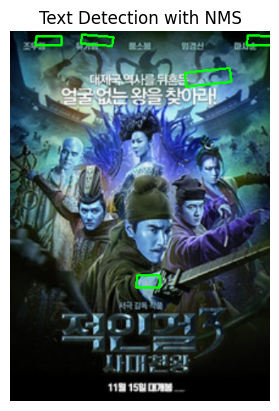

In [127]:
import cv2 as cv

model = r'C:\ex\prj_poster\some_models\frozen_east_text_detection.pb'
net = cv.dnn.readNet(model)

img = r'C:\ex\prj_poster\img3.jpg'
orig = cv.imread(img)
# inpWidth = 200
inpWidth = 320
# inpHeight = 300
inpHeight = 320
blob = cv.dnn.blobFromImage(orig, 1.0, (inpWidth, inpHeight), (123.68, 116.78, 103.94), True, False)

outputLayers = []
outputLayers.append("feature_fusion/Conv_7/Sigmoid")
outputLayers.append("feature_fusion/concat_3")

net.setInput(blob)
output = net.forward(outputLayers)
scores = output[0]
geometry = output[1]

def decode_predictions(scores, geometry, min_confidence):
    boxes = []
    confidences = []
    
    scores_data = scores[0, 0]  # 첫 번째 레이어의 스코어 데이터
    height, width = scores.shape[2:4]
    
    for x in range(width):
        for y in range(height):
            score = scores_data[y, x]
            # 신뢰도 기준
            if score < min_confidence:  # score가 배열이 아닌 경우
                continue

            offset_x = x * 4.0
            offset_y = y * 4.0

            # geometry를 사용하여 박스 정보 계산
            angle = geometry[0, 4, y, x]
            cos_a = np.cos(angle)
            sin_a = np.sin(angle)
            h = geometry[0, 0, y, x] + geometry[0, 2, y, x]
            w = geometry[0, 1, y, x] + geometry[0, 3, y, x]

            # 중심 좌표와 각도를 사용하여 박스 생성
            box = ((offset_x + cos_a * w / 2, offset_y + sin_a * h / 2), (w, h), -angle * 180 / np.pi)  # (x_center, y_center, width, height, angle)
            boxes.append(box)
            confidences.append(float(score))

    return boxes, confidences


# 신뢰도 기준 설정
confThreshold = 0.5

boxes, confidences = decode_predictions(scores, geometry, confThreshold)

nmsThreshold = 0.01  # NMS 임계값
if len(boxes) > 0:  # boxes가 비어있지 않을 경우에만 NMS 실행
    indices = cv.dnn.NMSBoxesRotated(boxes, confidences, confThreshold, nmsThreshold)
# indices = cv.dnn.NMSBoxesRotated(boxes, confidences, confThreshold, nmsThreshold)
print(boxes)
print(indices)
# 최종 박스 그리기
# 최종 박스 그리기
if indices is not None and len(boxes) > 0:
    for i in indices.flatten():  # 1D 배열로 변환
        box = boxes[i]  # 박스 가져오기
        # 박스를 (center_x, center_y), (width, height), angle로 분리
        center, (w, h), angle = box
        # 회전된 박스를 그리기 위한 꼭지점 계산
        vertices = cv.boxPoints(((center[0], center[1]), (w, h), angle))
        
        # 꼭지점 좌표를 정수형으로 변환
        vertices = np.int0(vertices)  # 변환된 꼭지점 좌표
        
        for j in range(4):
            p1 = tuple(vertices[j])  # 꼭지점 p1
            p2 = tuple(vertices[(j + 1) % 4])  # 다음 꼭지점 p2
            cv.line(orig, p1, p2, (0, 255, 0), 2)  # 박스 그리기

# 결과 표시
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.title('Text Detection with NMS')
plt.axis('off')
plt.show()